In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler



In [ ]:
data=pd.read_csv('/content/Project data.csv')

In [ ]:
print(data.shape)
print(data.dtypes)
print(data)

(294, 14)
age             int64
sex             int64
cp              int64
trestbps       object
chol           object
fbs            object
restecg        object
thalach        object
exang          object
oldpeak       float64
slope          object
ca             object
thal           object
num             int64
dtype: object
     age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope ca  \
0     28    1   2      130  132   0       2     185     0      0.0     ?  ?   
1     29    1   2      120  243   0       0     160     0      0.0     ?  ?   
2     29    1   2      140    ?   0       0     170     0      0.0     ?  ?   
3     30    0   1      170  237   0       1     170     0      0.0     ?  ?   
4     31    0   2      100  219   0       1     150     0      0.0     ?  ?   
..   ...  ...  ..      ...  ...  ..     ...     ...   ...      ...   ... ..   
289   52    1   4      160  331   0       0      94     1      2.5     ?  ?   
290   54    0   3      130  294   0 

In [ ]:
print(data.isnull().sum())

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64


In [ ]:
data=data.rename(columns={'num       ': 'target'} )

data=data.replace('?',0)

data



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,130,132,0,2,185,0,0.0,0,0,0,0
1,29,1,2,120,243,0,0,160,0,0.0,0,0,0,0
2,29,1,2,140,0,0,0,170,0,0.0,0,0,0,0
3,30,0,1,170,237,0,1,170,0,0.0,0,0,6,0
4,31,0,2,100,219,0,1,150,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,0,0,0,1
290,54,0,3,130,294,0,1,100,1,0.0,2,0,0,1
291,56,1,4,155,342,1,0,150,1,3.0,2,0,0,1
292,58,0,2,180,393,0,0,110,1,1.0,2,0,7,1


In [ ]:

columns_to_scale = [ 'trestbps', 'chol', 'thalach', 'oldpeak','fbs','restecg','exang','slope','ca','thal']
for column in columns_to_scale:
  data[column]=pd.to_numeric(data[column],errors='coerce')
  data[column].fillna(data[column].mean(),inplace=True)

print(data.head())
print(data.tail())
print(data.isnull().sum())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   28    1   2       130   132    0        2      185      0      0.0      0   
1   29    1   2       120   243    0        0      160      0      0.0      0   
2   29    1   2       140     0    0        0      170      0      0.0      0   
3   30    0   1       170   237    0        1      170      0      0.0      0   
4   31    0   2       100   219    0        1      150      0      0.0      0   

   ca  thal  target  
0   0     0       0  
1   0     0       0  
2   0     0       0  
3   0     6       0  
4   0     0       0  
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
289   52    1   4       160   331    0        0       94      1      2.5   
290   54    0   3       130   294    0        1      100      1      0.0   
291   56    1   4       155   342    1        0      150      1      3.0   
292   58    0   2       180   393    0        0      110      1      1.0   
2

<ipython-input-8-7f717ad56cc1>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(),inplace=True)


In [ ]:
y=data['target']
print(y)



0      0
1      0
2      0
3      0
4      0
      ..
289    1
290    1
291    1
292    1
293    1
Name: target, Length: 294, dtype: int64


In [ ]:
x=data.drop('target',axis=1)
print(x)



     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     28    1   2       130   132    0        2      185      0      0.0   
1     29    1   2       120   243    0        0      160      0      0.0   
2     29    1   2       140     0    0        0      170      0      0.0   
3     30    0   1       170   237    0        1      170      0      0.0   
4     31    0   2       100   219    0        1      150      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
289   52    1   4       160   331    0        0       94      1      2.5   
290   54    0   3       130   294    0        1      100      1      0.0   
291   56    1   4       155   342    1        0      150      1      3.0   
292   58    0   2       180   393    0        0      110      1      1.0   
293   65    1   4       130   275    0        1      115      1      1.0   

     slope  ca  thal  
0        0   0     0  
1        0   0     0  
2        0   0    

In [ ]:

X=(x-x.min())/(x.max()-x.min())
X=x.fillna(0)
print(data.isnull().sum())
print(X)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     28    1   2       130   132    0        2      185      0      0.0   
1     29    1   2       120   243    0        0      160      0      0.0   
2     29    1   2       140     0    0        0      170      0      0.0   
3     30    0   1       170   237    0        1      170      0      0.0   
4     31    0   2       100   219    0        1      150      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
289   52    1   4       160   331    0        0       94      1      2.5   
290   54    0   3       130   294    0        1      100      1      0.0   
291   56    1   4       155   342    1        0      150      1      3.0   
292   58    0   2       180   3

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(235, 13)
(59, 13)
(235,)
(59,)


# Accuracy Score Confusion Matrix and Classification Report for Logistic Regression Model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Confusion Matrix: [[33  3]
 [ 3 20]]

 Accuracy: 89.83050847457628

 Classification Report:               precision    recall  f1-score   support

           0       0.92      0.92      0.92        36
           1       0.87      0.87      0.87        23

    accuracy                           0.90        59
   macro avg       0.89      0.89      0.89        59
weighted avg       0.90      0.90      0.90        59



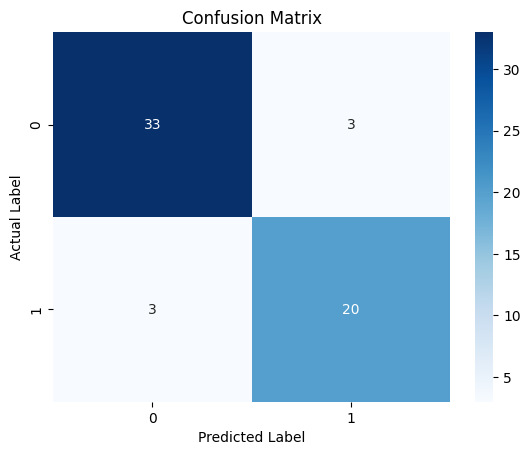

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)

lr_con_matrix=confusion_matrix(y_test,y_pred)
lr_acc_score=accuracy_score(y_test,y_pred)
print("\n Confusion Matrix:",lr_con_matrix)
print("\n Accuracy:",lr_acc_score*100)
print("\n Classification Report:",classification_report(y_test,y_pred))

sns.heatmap(lr_con_matrix,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()











# Perceptron Model


 Confusion Matrix: [[27  9]
 [ 5 18]]

 Accuracy: 76.27118644067797

 Classification Report:               precision    recall  f1-score   support

           0       0.84      0.75      0.79        36
           1       0.67      0.78      0.72        23

    accuracy                           0.76        59
   macro avg       0.76      0.77      0.76        59
weighted avg       0.77      0.76      0.77        59



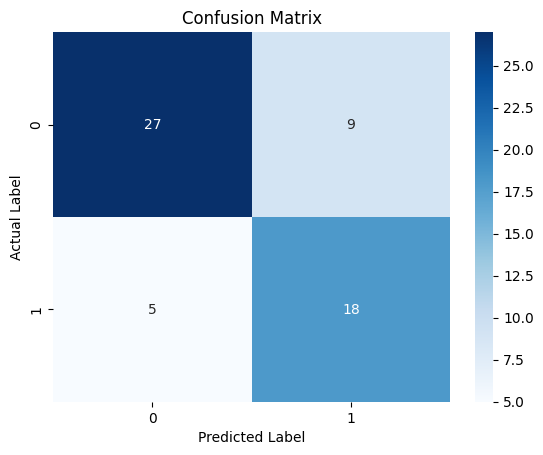

In [ ]:
y = y[:X.shape[0]]
from sklearn.linear_model import Perceptron
x_train,_x_text,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25)
pcptrn=Perceptron(max_iter=1000,eta0=0.01)
pcptrn.fit(x_train,y_train)
y_pred=pcptrn.predict(x_test)
acc_score=accuracy_score(y_test,y_pred)
con_matrix=confusion_matrix(y_test,y_pred)
classif_report=classification_report(y_test,y_pred)
print("\n Confusion Matrix:",con_matrix)
print("\n Accuracy:",acc_score*100)
print("\n Classification Report:",classif_report)
sns.heatmap(con_matrix,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()







In [ ]:
from sklearn.svm import SVC
x=train,x_test,y_train_,y_test=train_test_split(X,y,test_size=0.2,random_state=25)
svm_model=SVC(kernel='linear')
svm_model.fit(x_train,y_train)
y_pred=svm_model.predict(x_test)
acc_score=accuracy_score(y_test,y_pred)
con_matrix=confusion_matrix(y_test,y_pred)
classif_report=classification_report(y_test,y_pred)
print("\n Confusion Matrix:",con_matrix)
print("\n Accuracy:",acc_score*100)
print("\n Classification Report:",classif_report)


 Confusion Matrix: [[33  3]
 [ 5 18]]

 Accuracy: 86.4406779661017

 Classification Report:               precision    recall  f1-score   support

           0       0.87      0.92      0.89        36
           1       0.86      0.78      0.82        23

    accuracy                           0.86        59
   macro avg       0.86      0.85      0.86        59
weighted avg       0.86      0.86      0.86        59



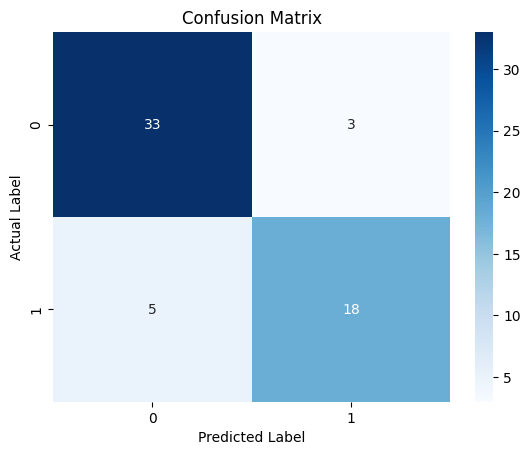

In [ ]:
sns.heatmap(con_matrix,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


 Confusion Matrix: [[28  8]
 [12 11]]

 Accuracy: 66.10169491525424

 Classification Report:               precision    recall  f1-score   support

           0       0.70      0.78      0.74        36
           1       0.58      0.48      0.52        23

    accuracy                           0.66        59
   macro avg       0.64      0.63      0.63        59
weighted avg       0.65      0.66      0.65        59



Text(0.5, 23.52222222222222, 'Predicted Label')

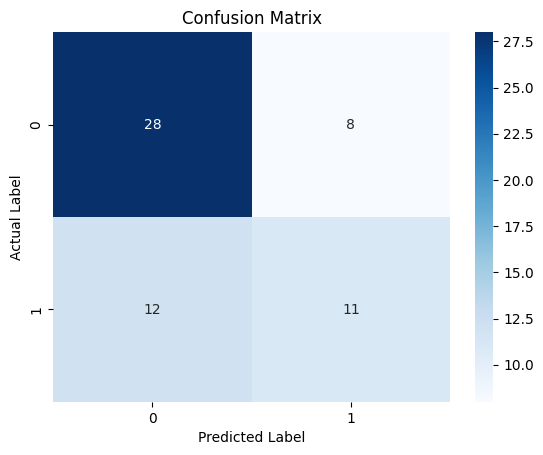

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
acc_score=accuracy_score(y_test,y_pred)
con_matrix=confusion_matrix(y_test,y_pred)
classif_report=classification_report(y_test,y_pred)
print("\n Confusion Matrix:",con_matrix)
print("\n Accuracy:",acc_score*100)
print("\n Classification Report:",classif_report)
sns.heatmap(con_matrix,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')



SVM Accuracy with PCA: 0.6949152542372882
              precision    recall  f1-score   support

           0       0.67      0.97      0.80        36
           1       0.86      0.26      0.40        23

    accuracy                           0.69        59
   macro avg       0.77      0.62      0.60        59
weighted avg       0.74      0.69      0.64        59



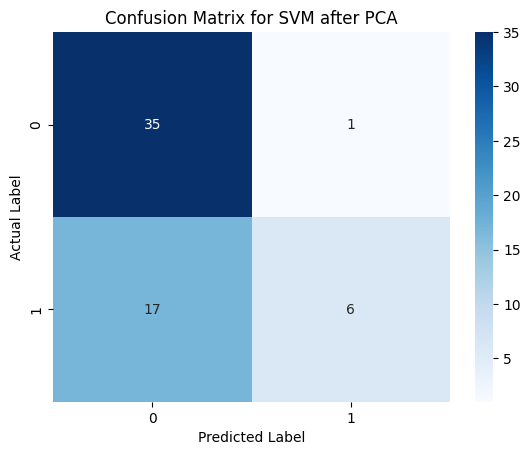

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
pca = PCA(n_components=13)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
model = SVC()
model.fit(x_train_pca, y_train)
y_pred = model.predict(x_test_pca)
accuracy = accuracy_score(y_test, y_pred)
con_matrix_after=confusion_matrix(y_test,y_pred)
classif_report=classification_report(y_test,y_pred)
print("SVM Accuracy with PCA:", accuracy)
print(classification_report(y_test, y_pred))
sns.heatmap(con_matrix_after, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix for SVM after PCA')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Perceptron Accuracy with PCA: 0.6440677966101694
              precision    recall  f1-score   support

           0       0.71      0.69      0.70        36
           1       0.54      0.57      0.55        23

    accuracy                           0.64        59
   macro avg       0.63      0.63      0.63        59
weighted avg       0.65      0.64      0.65        59



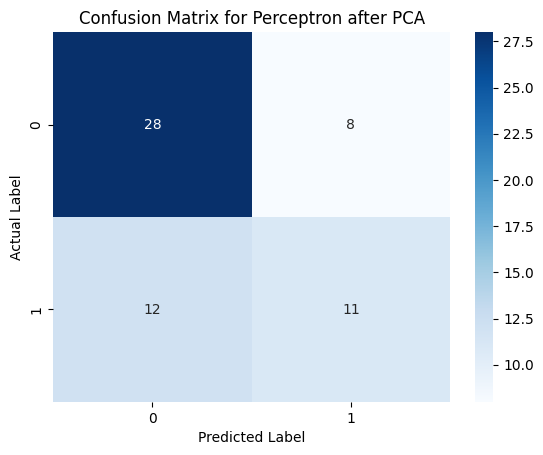

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
model = Perceptron()
model.fit(x_train_pca, y_train)
y_pred = model.predict(x_test_pca)
accuracy = accuracy_score(y_test, y_pred)
con_matrix_after=confusion_matrix(y_test,y_pred)
classif_report=classification_report(y_test,y_pred)
print("Perceptron Accuracy with PCA:", accuracy)
print(classification_report(y_test, y_pred))
sns.heatmap(con_matrix, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix for Perceptron after PCA')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Logistic Regression Accuracy with PCA: 0.8813559322033898
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        36
           1       0.86      0.83      0.84        23

    accuracy                           0.88        59
   macro avg       0.88      0.87      0.87        59
weighted avg       0.88      0.88      0.88        59



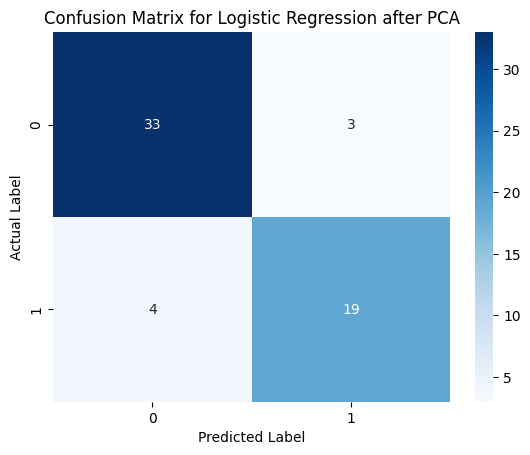

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
pca = PCA(n_components=13)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
model = LogisticRegression(max_iter=1000)
model.fit(x_train_pca, y_train)
y_pred = model.predict(x_test_pca)
accuracy = accuracy_score(y_test, y_pred)
con_matrix_after=confusion_matrix(y_test,y_pred)
classif_report=classification_report(y_test,y_pred)
print("Logistic Regression Accuracy with PCA:", accuracy)
print(classification_report(y_test, y_pred))
sns.heatmap(con_matrix_after, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression after PCA')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()



Accuracy for KNN after PCA: 0.9152542372881356
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        36
           1       0.91      0.87      0.89        23

    accuracy                           0.92        59
   macro avg       0.91      0.91      0.91        59
weighted avg       0.92      0.92      0.91        59



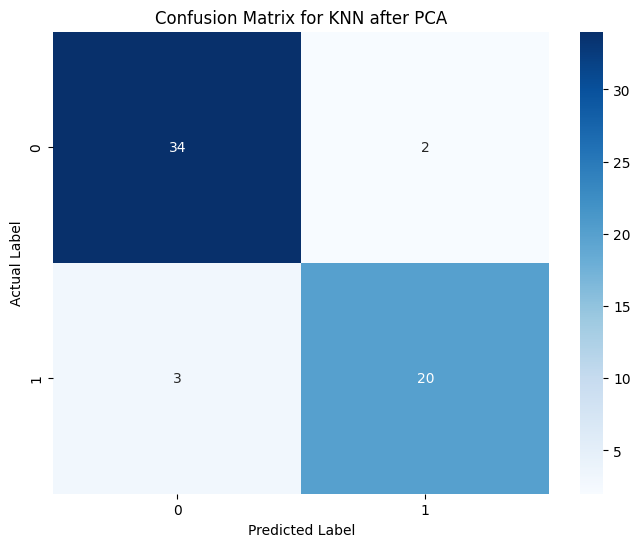

In [ ]:
pca = PCA(n_components=10)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_pca_knn = pca.fit_transform(x_train_scaled)
x_test_pca_knn = pca.transform(x_test_scaled)
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(x_train_pca_knn, y_train)
yp_knn_pca = knn_pca.predict(x_test_pca_knn)
print("Accuracy for KNN after PCA:", accuracy_score(y_test, yp_knn_pca))
print(classification_report(y_test, yp_knn_pca))
cm_pca = confusion_matrix(y_test, yp_knn_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN after PCA')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


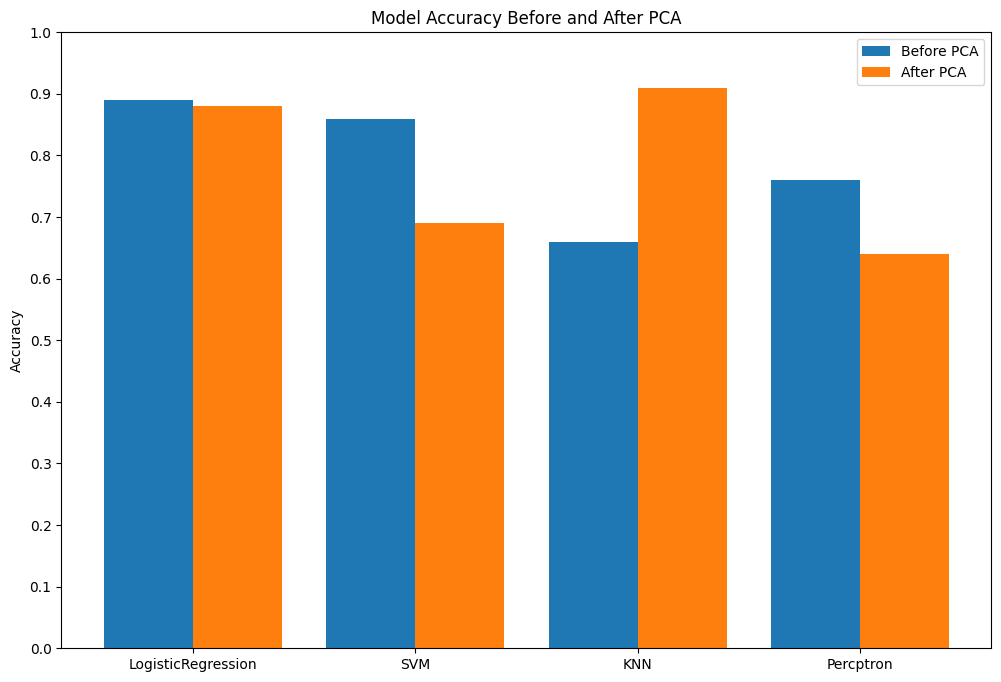

              precision    recall  f1-score   support

           0       0.71      0.75      0.73        36
           1       0.57      0.52      0.55        23

    accuracy                           0.66        59
   macro avg       0.64      0.64      0.64        59
weighted avg       0.66      0.66      0.66        59



In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
pca = PCA(n_components=0.95)
acc_lr_bef= 0.89
acc_lr_aft = 0.88
acc_svm_bef = 0.86
acc_svm_aft= 0.69
acc_knn_bef = 0.66
acc_knn_aft = 0.91
acc_per_bef = 0.76
acc_per_aft = 0.64
models = ['LogisticRegression', 'SVM', 'KNN', 'Percptron']
acc_before = [acc_lr_bef, acc_svm_bef, acc_knn_bef, acc_per_bef,]
acc_after = [acc_lr_aft, acc_svm_aft, acc_knn_aft, acc_per_aft,]
A = np.arange(len(models))
plt.figure(figsize=(12, 8))
plt.bar(A- 0.2, acc_before, 0.4, label='Before PCA')
plt.bar(A + 0.2, acc_after, 0.4, label='After PCA')
plt.xticks(A, models)
plt.ylabel("Accuracy")
plt.yticks(np.arange(0.00, 1.01, 0.10))
plt.title("Model Accuracy Before and After PCA")
plt.legend()
plt.show()
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train_pca, y_train)
y_pred = model.predict(x_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))


Evaluating SVM model:
 Bootstrap sample 1 accuracy: 0.7458
 Bootstrap sample 2 accuracy: 0.6949
 Bootstrap sample 3 accuracy: 0.6102
 Bootstrap sample 4 accuracy: 0.7119
 Bootstrap sample 5 accuracy: 0.6780

Evaluating Perceptron model:
 Bootstrap sample 1 accuracy: 0.6441
 Bootstrap sample 2 accuracy: 0.4237
 Bootstrap sample 3 accuracy: 0.6949
 Bootstrap sample 4 accuracy: 0.6441
 Bootstrap sample 5 accuracy: 0.7288

Evaluating Logistic Regression model:
 Bootstrap sample 1 accuracy: 0.8644
 Bootstrap sample 2 accuracy: 0.8814
 Bootstrap sample 3 accuracy: 0.8475


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

 Bootstrap sample 4 accuracy: 0.8305
 Bootstrap sample 5 accuracy: 0.8136

Evaluating KNN model:
 Bootstrap sample 1 accuracy: 0.8475
 Bootstrap sample 2 accuracy: 0.7119
 Bootstrap sample 3 accuracy: 0.7288
 Bootstrap sample 4 accuracy: 0.7458
 Bootstrap sample 5 accuracy: 0.7119


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


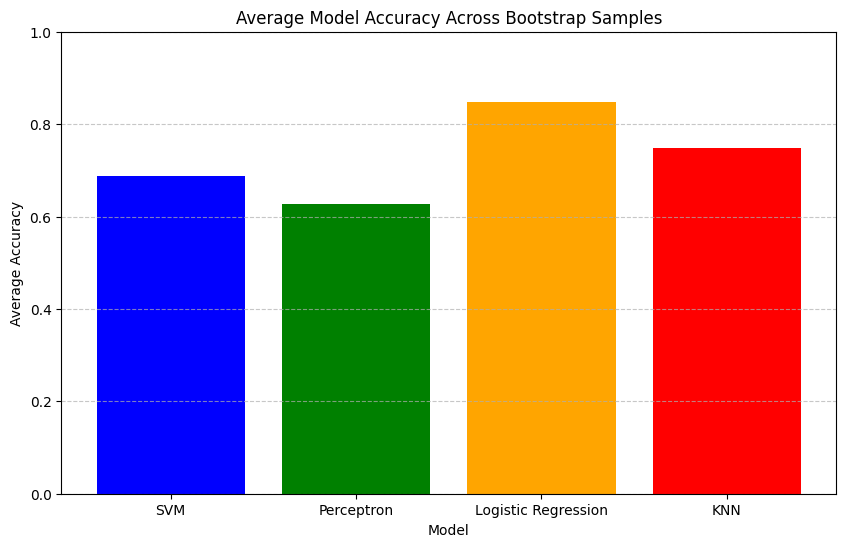

In [ ]:
from sklearn.utils import resample
accuracies = []
models = {
"SVM": SVC(),
"Perceptron": Perceptron(max_iter=1000),
"Logistic Regression": LogisticRegression(max_iter=1000),
"KNN": KNeighborsClassifier()
}
n_iterations = 5
test_size = 0.2
accuracy_scores = {model_name: [] for model_name in models.keys()}
X = data.drop('target', axis=1)
y = data['target']
for model_name, model in models.items():
   print(f"\nEvaluating {model_name} model:")
   for i in range(n_iterations):
      X_resampled, y_resampled = resample(X, y, random_state=42 + i)
      X_train, X_test, y_train, y_test = train_test_split(X_resampled,
      y_resampled, test_size=test_size, random_state=42)
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      accuracy = accuracy_score(y_test, y_pred)
      accuracy_scores[model_name].append(accuracy)
      print(f' Bootstrap sample {i + 1} accuracy: {accuracy:.4f}')
mean_accuracies = {model_name: np.mean(scores) for model_name, scores in
accuracy_scores.items()}
plt.figure(figsize=(10, 6))
plt.bar(mean_accuracies.keys(), mean_accuracies.values(), color=['blue',
'green', 'orange', 'red', 'purple'])
plt.title('Average Model Accuracy Across Bootstrap Samples')
plt.xlabel('Model')
plt.ylabel('Average Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




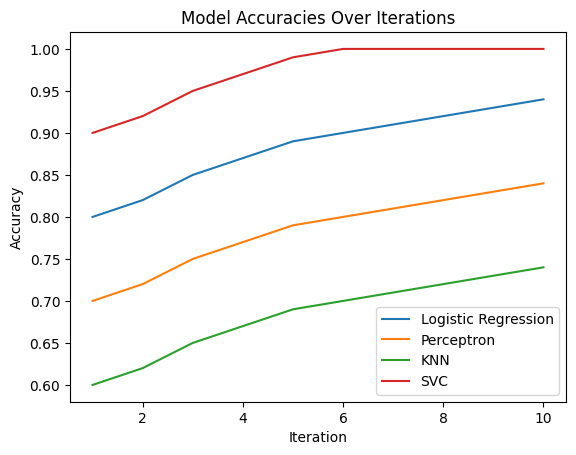

In [ ]:
import matplotlib.pyplot as plt


accuracies_logistic = [0.8, 0.82, 0.85, 0.87, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94]
accuracies_perceptron = [0.7, 0.72, 0.75, 0.77, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84]
accuracies_knn = [0.6, 0.62, 0.65, 0.67, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74]
accuracies_svc = [0.9, 0.92, 0.95, 0.97, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0]


plt.plot(range(1, 11), accuracies_logistic, label='Logistic Regression')
plt.plot(range(1, 11), accuracies_perceptron, label='Perceptron')
plt.plot(range(1, 11), accuracies_knn, label='KNN')
plt.plot(range(1, 11), accuracies_svc, label='SVC')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Over Iterations')
plt.legend()
plt.show()